En este ejercicio vamos a tratar con el dataset "Global Shark Attacks" que recoge una base de datos de
incidentes humano-tiburón. Más información sobre el dataset <a href="http://www.sharkattackfile.net/index.htm">aquí</a>.

** 1. Descarga de datos **

Hay una descripción en Kaggle, esta es la página Web: <a href="https://www.kaggle.com/teajay/global-shark-attacks">kaggle</a>
Y el enlace a la descarga directa es: <a href="https://www.kaggle.com/teajay/global-shark-attacks/downloads/global-shark-attacks.zip">link</a>
Nótese que kaggle requiere identificarse, por lo que no pueden descargarse sin autentificación los ficheros.

Se pide lo siguiente:
- Cargad el fichero en un DataFrame de pandas .
- Comparad las columns cargadas con las del fichero Excel (ver <a href="http://www.sharkattackfile.net/incidentlog.htm">link</a>). ¿Hay información que deberíamos
quitar? Nota: con columns podemos obtener la lista de columnas del DataFrame.


In [26]:
import pandas as pd

#Empleando codificación utf-8 devuelve un error de lectura
sharksdf = pd.read_csv("sharks/attacks.csv", sep=',', encoding='windows-1252', skipinitialspace=True)

#pd.read_csv?
print(sharksdf.shape)
sharksdf.head(3)
#sharksdf.columns
#Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
#       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
#       'Species ', 'Investigator or Source'],
#      dtype='object')
#Las columnas coiniciden exactamente con las del fichero Excel de la organizacón

#http://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

(5992, 16)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"


** 2. Observación de valores nulos **

- El siguiente paso es observar los datos, los valores que toman y si hay valores nulos.
Identificad las columnas en las que hay valores nulos y las que no y cuántas en cada una. Por
ejemplo, parece que las hay en la columna Species. Nota: usar isnull()

In [19]:
#Indica los NaN por columna
print(sharksdf.isnull().sum())
print("Total: ", sharksdf.isnull().sum().sum())
#http://stackoverflow.com/questions/29530232/python-pandas-check-if-any-value-is-nan-in-dataframe

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
dtype: int64
Total:  11124


- Para las columnas con información categórica, observar las etiquetas de cada categoría, por
ejemplo, las especies de tiburones o el tipo de incidente.

In [92]:
#Columnas con información categórica (ver Excel), sin contar países ni fechas
#Type: Boat, Boating, Invalid, Provoked, Sea Disaster, Unprovoked
#Sex: M, F, N, LLi
#Fatal Y/N: Y,N, UNKNOWN, ...
#Species: ...
#El resto parecen datos que se pueden introducir como texto libre, no forman parte de una enumeración.

#Alternativa:
#sexDf = pd.Categorical(sharksdf['Sex '])

#Se extrae una columna como serie (no como DataFrame) que contiene una variable Categorical
sexSerie = sharksdf['Sex '].astype('category')
#Se identifican los componentes únicos y se descartan los NaN
sexCategories = sexSerie.unique().dropna()
print("Sex Categories: ", sexCategories)

typeSerie = sharksdf['Type'].astype('category')
typeCategories = typeSerie.unique().dropna()
print("Type Categories: ", typeCategories)

fatalSerie = sharksdf['Fatal (Y/N)'].astype('category')
fatalCategories = fatalSerie.unique().dropna()
print("Fatal Categories: ", fatalCategories)
#En este caso se observan 'n' y 'N', se podría intentar sustituir los valores por los equivalentes en mayúsculas o minúsculas
#para evitar duplicados

speciesSerie = sharksdf['Species '].astype('category')
speciesCategories = speciesSerie.unique().dropna()
print("Species Categories: ", speciesCategories)
#La variable de espcies más bien parece algo introducido como texto libre.

#http://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
#http://stackoverflow.com/questions/29530232/python-pandas-check-if-any-value-is-nan-in-dataframe
#http://stackoverflow.com/questions/29530232/python-pandas-check-if-any-value-is-nan-in-dataframe

Sex Categories:  [M, F, M, lli, N, .]
Categories (6, object): [M, F, M, lli, N, .]
Type Categories:  [Unprovoked, Boat, Provoked, Invalid, Sea Disaster, Boating]
Categories (6, object): [Unprovoked, Boat, Provoked, Invalid, Sea Disaster, Boating]
Fatal Categories:  [N, Y, UNKNOWN, F, N, --M524--M3133Y, n]
Categories (7, object): [N, Y, UNKNOWN, F, N, --M524--M3133Y, n]
Species Categories:  [2 m shark, 3' to 4' shark, Tiger shark, 10?, White shark, Bull shark, 6', ..., Bull shark caught, leg recovered & buried besi..., "a black-tipped shark", 12' tiger shark, Blue pointers, Said to involve a grey nurse shark that leapt ...]
Length: 1534
Categories (1534, object): [2 m shark, 3' to 4' shark, Tiger shark, 10?, White shark, ..., "a black-tipped shark", 12' tiger shark, Blue pointers, Said to involve a grey nurse shark that leapt ...]


- Concretamente, obtener las 5 especies de tiburón con más incidentes registrados en la base de
datos. Nota: Puede hacers con groupby() o dividiendo el array por especies, y contando cada
subconjunto.

In [228]:
import numpy as np

#Se extrae la columna y se filtran los NaN
speciesDf = sharksdf[['Species ']].dropna()

#Añadir una columna con unos para realizar la cuenta
speciesDf['incidents'] = np.ones(len(speciesDf))

#print(type(speciesDf))

sharksAgg = speciesDf.groupby('Species ')\
    .count()\
    .sort_values(['incidents'], ascending=False)\
    .head(5)

#Mostrar las 5 especies con mayor número de incidentes
sharksAgg

#http://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
#http://stackoverflow.com/questions/40454030/pandas-count-and-sort

,incidents
Species,
White shark,162
Shark involvement not confirmed,80
Tiger shark,68
Bull shark,52
6' shark,40


** 3. Más valores nulos **

Vamos a examinar la ocurrencia de eventos por años y países. Para ello:
Queremos utilizar como índice (país, año) primero. Probar a establecerlo con set_index() .
- ¿Hay algún problema de valores nulos en el índice? ¿Son NA o también hay años no válidos?
¿Cómo se pueden eliminar?
- Obtener la cuenta de los incidentes en USA en 2014 y 2015. Utilizad loc e iloc en la misma
expresión.

In [209]:
#En Year no hay valores nulos pero en Country hay 43 (ver apartado anterior)
#Establecer el multi-índice.

#Primero se suprimen los valores NaN de Country
byCountry = sharksdf.set_index(['Country'])
#byCountry.shape #(5992,15)

#Filtrado de valores NaN en columna Country
byCountry = byCountry[pd.notnull(byCountry.index)]
#byCountry.shape #(5949, 15) -> se suprimen los 43 elementos missing

#Generar el df con el multi-indice final
byCountryYear = byCountry.reset_index().set_index(['Country', 'Year'])
#byCountryYear.shape #(5949, 14)
#byCountryYear.head(4)

#DESCONOZCO CÓMO APLICAR AMBAS FUNCIONES EN LA MISMA EXPRESIÓN. SE PROCEDE EN DOS PASOS
countryLevels = byCountryYear.index.get_level_values('Country')
usaIncidents = byCountryYear.loc[countryLevels == 'USA']
#print(usaIncidents.shape) #(2116, 14)

#Obtención de los índices para aplicar iloc
yearLevelsArray = usaIncidents.index.get_level_values('Year').values
idxYears = np.where(np.logical_or(yearLevelsArray == 2014, yearLevelsArray == 2015))
#type(idxYears[0]) #tuple
#print(len(idxYears[0])) #137 elementos que coinciden

usa1415Incidents = usaIncidents.iloc[idxYears]
print(usa1415Incidents.shape)
usa1415Incidents


#http://stackoverflow.com/questions/19670904/trying-to-drop-nan-indexed-row-in-dataframe
#http://stackoverflow.com/questions/17921010/how-to-query-multiindex-index-columns-values-in-pandas

(137, 14)


Case Number                  Date        Type            Area  \
Country Year                                                                   
USA     2015    2015.12.22           22-Dec-2015  Unprovoked          Hawaii   
        2015    2015.11.16           16-Nov-2015  Unprovoked         Florida   
        2015  2015.11.15.b           15-Nov-2015  Unprovoked         Florida   
        2015  2015.11.15.a           15-Nov-2015  Unprovoked         Florida   
        2015    2015.12.23           07-Nov-2015     Invalid         Florida   
        2015    2015.11.03           03-Nov-2015  Unprovoked          Hawaii   
        2015  2015.11.01.b           01-Nov-2015  Unprovoked         Florida   
        2015  2015.10.28.a           28-Oct-2015  Unprovoked          Hawaii   
        2015    2015.10.21           21-Oct-2015  Unprovoked         Florida   
        2015    2015.10.19           19-Oct-2015  Unprovoked         Florida   
        2015  2015.10.17.b           17-Oct-2015     Invalid          Hawaii   
        2015  2015.10.17.a           17-Oct-2015  Unprovoked          Hawaii   
        2015    2015.10.13           13-Oct-2015        Boat      California   
        2015  2015.10.09.b           09-Oct-2015  Unprovoked  South Carolina   
        2015  2015.10.09.a           09-Oct-2015  Unprovoked          Hawaii   
        2015  2015.10.05.b           05-Oct-2015  Unprovoked         Florida   
        2015  2015.10.05.a           05-Oct-2015  Unprovoked           Texas   
        2015    2015.10.04           04-Oct-2015  Unprovoked         Florida   
        2015    2015.09.29           29-Sep-2015  Unprovoked         Florida   
        2015    2015.09.24           24-Sep-2015  Unprovoked      California   
        2015  2015.09.20.d           20-Sep-2015  Unprovoked         Florida   
        2015  2015.09.20.c           20-Sep-2015  Unprovoked          Hawaii   
        2015  2015.09.20.b           20-Sep-2015  Unprovoked         Florida   
        2015  2015.09.20.a           20-Sep-2015  Unprovoked         Florida   
        2015    2015.09.18           18-Sep-2015  Unprovoked         Florida   
        2015    2015.09.17           17-Sep-2015  Unprovoked         Florida   
        2015    2015.09.06           06-Sep-2015  Unprovoked      California   
        2015    2015.09.05           05-Sep-2015    Provoked      California   
        2015    2015.09.03           03-Sep-2015  Unprovoked  South Carolina   
        2015  2015.08.29.b           29-Aug-2015  Unprovoked      California   
...                    ...                   ...         ...             ...   
        2014    2014.08.06           06-Aug-2014  Unprovoked  South Carolina   
        2014    2014.08.05           05-Aug-2014  Unprovoked         Florida   
        2014    2014.08.02           02-Aug-2014  Unprovoked         Florida   
        2014    2014.08.02           02-Aug-2014  Unprovoked         Florida   
        2014    2014.07.27           27-Jul-2014  Unprovoked  North Carolina   
        2014    2014.07.21           21-Jul-2014  Unprovoked         Florida   
        2014    2014.07.16           16-Jul-2014  Unprovoked          Hawaii   
        2014    2014.07.14           14-Jul-2014  Unprovoked         Florida   
        2014    2014.07.12           12-Jul-2014  Unprovoked  North Carolina   
        2014    2014.07.09            9-Jul-2014  Unprovoked         Florida   
        2014  2014.07.05.b            5-Jul-2014    Provoked      California   
        2014  2014.07.05.a            5-Jul-2014  Unprovoked      California   
        2014    2014.07.03            3-Jul-2014  Unprovoked  South Carolina   
        2014  2014.06.09.b           09-Jun-2014  Unprovoked        Delaware   
        2014    2014.06.07           07-Jun-2014  Unprovoked           Texas   
        2014  2014.06.01.c           01-Jun-2014  Unprovoked         Florida   
        2014  2014.06.01.a           01-Jun-2014  Unprovoked   Palmyra Atoll   
        2014   

** 4. Distribución y correlaciones (i) **

Ahora queremos observar la distribución de los incidentes, primero por países y luego por años.
- Mostrar los tres países que tienen más incidentes.

In [227]:
#Procedimiento similar al del apartado 2

#Se extrae la columna y se filtran los NaN
countriesDf = sharksdf[['Country']].dropna()

#Añadir una columna con unos para realizar la cuenta
countriesDf['incidents'] = np.ones(len(countriesDf))

mostIncidentsCountries = countriesDf.groupby('Country')\
    .count()\
    .sort_values(['incidents'], ascending=False)\
    .head(3)

#Mostrar los tres países que tienen más incidentes.
mostIncidentsCountries

,incidents
Country,
USA,2116
AUSTRALIA,1279
SOUTH AFRICA,565


- Dibujar la distribución por años de los incidentes, señalar el año en el que más se han producido.
- Para los dos países con más incidentes, mostrar su evolución por años. (USA y AUSTRALIA)

Year with most incidents:  2015 ( 139 )


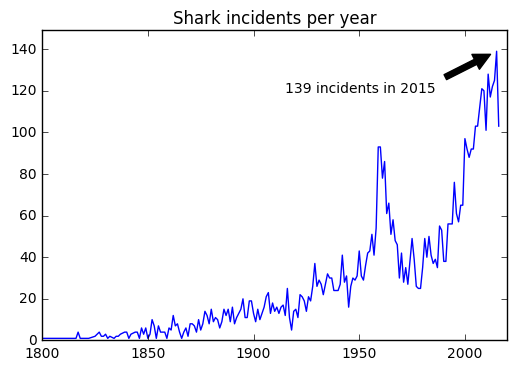

In [305]:
import matplotlib.pyplot as plt
%matplotlib inline

yearsDf = sharksdf[['Year']].dropna()
yearsDf = yearsDf[yearsDf['Year'] > 0]
yearsDf['incidents'] = np.ones(len(yearsDf))

#Cálculo puro empleando funciones
byYear = yearsDf.groupby('Year').count()

#Año con mayor número de incidentes
sortedIncidentsPerYear = byYear.sort_values(['incidents'], ascending=False)
mostIncidentsYear = sortedIncidentsPerYear.index[0]
mostIncidentsNum = sortedIncidentsPerYear.values[0][0]
print("Year with most incidents: ", mostIncidentsYear, "(", mostIncidentsNum, ")")


#Representación
#La gráfica por defecto queda un poco mal. Hacemos zoom desde 1800
plt.plot(byYear.index, byYear.values)

axes = plt.gca()
axes.set_xlim([1800,2020])
axes.set_ylim([0, mostIncidentsNum + 10])

plt.title("Shark incidents per year")

#Anotar el máximo

t = plt.annotate(str(mostIncidentsNum) + ' incidents in ' + str(mostIncidentsYear),
        xy=(mostIncidentsYear, mostIncidentsNum),
        xytext=(mostIncidentsYear - 100, mostIncidentsNum - 20),
        arrowprops=dict(facecolor='black', shrink=0.1),
    )